In [1]:
!pip install konlpy
!pip install JPype1
!pip install kss
!pip install fastapi
!pip install uvicorn
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt
from konlpy.tag import Kkma
import pandas as pd
from konlpy.tag import Okt
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import joblib
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 캠핑 스타일	장비	편의시설	활동	동행	자연환경	이동수단	편안함	4진수 코드
# 오토캠핑	0	0	3	1	0	0	1	0031001
# 백패킹	1	1	0	0	0	3	2	1100032
# 미니멀캠핑	1	1	0	0	0	3	2	1100032
# 차박캠핑	0	1	3	0	0	0	1	0030001
# 캠프닉	1	1	2	1	0	3	2	1121032
# 글램핑	0	0	3	1	0	0	0	0031000
# 풀캠핑	0	0	3	1	0	0	0	0031000
# 모토캠핑	1	1	3	0	0	1	2	1130002
# 브롬핑	1	1	1	0	0	2	2	1110022

In [5]:
# 모델 학습

data = {
    'style': ['오토캠핑', '백패킹', '미니멀캠핑', '차박캠핑', '캠프닉', '글램핑', '풀캠핑', '모토캠핑', '브롬핑'],
    'gear_amount': [0, 1, 1, 0, 1, 0, 0, 1, 1],
    'convenience_facility': [0, 1, 1, 1, 1, 0, 0, 1, 1],
    'activity': [3, 0, 0, 3, 2, 3, 3, 3, 1],
    'companion': [1, 0, 0, 0, 1, 1, 1, 0, 0],
    'nature': [0, 0, 0, 0, 0, 0, 0, 0, 0],
    'transport': [0, 3, 3, 0, 3, 0, 0, 1, 2],
    'comfort': [1, 2, 2, 1, 2, 0, 0, 2, 2]
}

df = pd.DataFrame(data)

# 특성과 라벨 분리
X = df.drop(columns='style')
y = df['style']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

pkl_path = '/content/drive/MyDrive/스타일 추천.pkl'
# 모델을 파일로 저장
joblib.dump(model, pkl_path)

['/content/drive/MyDrive/스타일 추천.pkl']

In [6]:
# 예제 사용자 입력
user_input = {
    'gear_amount': 1,           # 많은 장비 사용 여부
    'convenience_facility': 0,  # 편의시설 중요 여부
    'activity': 3,              # 활동 없음
    'companion': 2,             # 가족 또는 친구와 함께
    'nature': 0,                # 특정 자연환경 선호 여부
    'transport': 1,             # 차량 이용 여부
    'comfort': 1                # 중간 수준 편안함
}

# 사용자 입력을 DataFrame으로 변환
user_df = pd.DataFrame([user_input])

# 예측
recommended_style = model.predict(user_df)
print("추천 캠핑 스타일:", recommended_style[0])


추천 캠핑 스타일: 캠프닉


In [7]:
camping_categories = {
    '일반야영지': ['백패킹', '미니멀캠핑', '캠프닉', '모토캠핑', '브롬핑'],
    '자동차야영지': ['오토캠핑', '차박캠핑', '풀캠핑', '모토캠핑', '브롬핑'],
    '카라반': ['오토캠핑', '차박캠핑'],
    '글램핑': ['글램핑']
}

In [16]:
data1 = pd.read_csv('/content/drive/MyDrive/GoCamping_Info.csv')
data2 = pd.read_csv('/content/drive/MyDrive/camp_style_info.csv')
data3 = pd.read_csv('/content/drive/MyDrive/result_tokens.csv')

# NaN 값을 빈 문자열로 대체
data1 = data1.fillna('')
data2 = data2.fillna('')

In [9]:
# 데이터프레임 생성
data1 = pd.DataFrame(data1)

# Okt 객체 생성
okt = Okt()

# new_id 정규화 함수
def solution(new_id):
    st = re.sub(r'[^a-z0-9ㄱ-힣]', ' ', new_id)
    return st


# 데이터에서 형태소 분석한 결과를 반환하는 함수
def tokenize_data1():
    facltNm_tokens = {}
    for i in range(len(data1['intro'])):
        facltNm = data1['facltNm'][i]
        text = data1['intro'][i]
        # Check if text is not NaN
        if pd.notna(text):
            # Apply the solution function to normalize text
            text = solution(text)
            tokens = okt.morphs(text)
            if facltNm not in facltNm_tokens:
                facltNm_tokens[facltNm] = tokens
            else:
                facltNm_tokens[facltNm].extend(tokens)
    return facltNm_tokens

# 함수 호출 및 결과 할당
facltNm_tokens = tokenize_data1()

# 불용어 리스트
stop_words = "은 는 이 가 을 를 에 에서 의 도 으로 로 에게 에서 한테 까지 부터 와 과 및 그리고 그러나 그래서 하지만 그러면 그렇지만 또는 따라서 즉 것 수 등 때 등등 자 듯 뿐 만 중 방금 현재 모든 각종 각각 대부분 무슨 어떤 여러 조금 아주 많이 적당히 정말 진짜 대단히 이다 다 나 자 지 습니다 요 십시오 읍시다 네 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓"
stop_words = set(stop_words.split())

# 불용어 제거 및 데이터프레임 생성
result = {facltNm: [word for word in tokens if word not in stop_words] for facltNm, tokens in facltNm_tokens.items()}

# 데이터프레임으로 변환
result_df = pd.DataFrame(list(result.items()), columns=['facltNm', 'tokens'])

# CSV 파일로 저장
result_df.to_csv('/content/drive/MyDrive/result_tokens.csv', index=False)

print("CSV 파일 저장 완료: /content/drive/MyDrive/result_tokens.csv")


CSV 파일 저장 완료: /content/drive/MyDrive/result_tokens.csv


In [21]:
# TF-IDF 벡터화
tfidf_vector = TfidfVectorizer()
tfidf_matrix_data1 = tfidf_vector.fit_transform(data1['intro'])
tfidf_matrix_data2 = tfidf_vector.transform(data2['설명'])
tfidf_matrix_data3 = tfidf_vector.fit_transform(data3['tokens'])

# 환경 및 테마 특성 벡터화
envrn_vectorizer = TfidfVectorizer()
thema_vectorizer = TfidfVectorizer()

envrn_tfidf_matrix = envrn_vectorizer.fit_transform(data1['lctCl'])
thema_tfidf_matrix = thema_vectorizer.fit_transform(data1['themaEnvrnCl'])

In [22]:
# 산 숲 해변 도심을 기준으로 필터링

df_IctCl = pd.DataFrame(data1)

# 대주제별 리스트
mountains_data_need = df_IctCl[df_IctCl['lctCl'].str.contains('산', na=False)]['lctCl'].tolist()
forests_data_need = df_IctCl[df_IctCl['lctCl'].str.contains('숲', na=False)]['lctCl'].tolist()
beaches_data_need = df_IctCl[df_IctCl['lctCl'].str.contains('해변', na=False)]['lctCl'].tolist()
cities_data_need = df_IctCl[df_IctCl['lctCl'].str.contains('도심', na=False)]['lctCl'].tolist()

# 결과 출력
print("Mountains in data_need:", mountains_data_need)
print("Forests in data_need:", forests_data_need)
print("Beaches in data_need:", beaches_data_need)
print("Cities in data_need:", cities_data_need)

Mountains in data_need: ['산,강', '산,숲,강', '산', '산', '산', '산,계곡', '산,숲,계곡', '산', '산', '산,계곡', '산', '산', '산', '산', '섬,산,계곡', '산', '산,숲', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산,숲', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산,숲,계곡,강', '산', '산,숲', '산', '산', '산', '산,숲,계곡', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산,계곡', '산', '산,숲', '산,계곡', '산', '산', '산', '산', '산,숲,계곡', '산,숲', '산', '산', '산', '산', '산,숲', '산', '산,숲', '산,숲', '해변,산', '산', '산,계곡', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산,숲,호수', '산', '산', '산', '산', '산', '산,숲', '산', '산', '산', '산,숲', '산,숲', '산,계곡', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산,숲,계곡', '산,계곡', '산', '산', '산', '산,숲', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산,숲', '산', '산', '산,계곡', '산', '산', '산', '산,숲', '산,계곡', '산', '산', '산', '산,숲', '산', '산', '산,숲', '산', '산', '산', '산,계곡', '산', '산,숲', '산,계곡', '산', '산', '산,숲', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산', '산,강', '산'

In [23]:
df_themaEnvrnCl = pd.DataFrame(data1)
df_posblFcltyCl = pd.DataFrame(data1)

# 대주제별 리스트
play_ground = df_themaEnvrnCl[df_themaEnvrnCl['themaEnvrnCl'].str.contains('여름물놀이|낚시', na=False)]['themaEnvrnCl'].tolist(), df_posblFcltyCl[df_posblFcltyCl['posblFcltyCl'].str.contains('낚시|어린이놀이시설|청소년체험시설|농어촌체험시설|', na=False)]['posblFcltyCl'].tolist()
tracking_road = df_themaEnvrnCl[df_themaEnvrnCl['themaEnvrnCl'].str.contains('걷기길|일출명소|일몰명소', na=False)]['themaEnvrnCl'].tolist(), df_posblFcltyCl[df_posblFcltyCl['posblFcltyCl'].str.contains('산책로', na=False)]['posblFcltyCl'].tolist()
flower_trip = df_themaEnvrnCl[df_themaEnvrnCl['themaEnvrnCl'].str.contains('봄꽃여행|가을단풍명소|겨울눈꽃명소', na=False)]['themaEnvrnCl'].tolist()
activities = df_themaEnvrnCl[df_themaEnvrnCl['themaEnvrnCl'].str.contains('액티비티|수상레저|항공레저|스키|항공레저', na=False)]['themaEnvrnCl'].tolist(), df_posblFcltyCl[df_posblFcltyCl['posblFcltyCl'].str.contains('계곡 물놀이|수영장|강/물놀이|해수욕|수상레저', na=False)]['posblFcltyCl'].tolist(),df_posblFcltyCl[df_posblFcltyCl['posblFcltyCl'].str.contains('계곡 물놀이|수영장|강/물놀이|해수욕|수상레저', na=False)]['posblFcltyCl'].tolist()



# 결과 출력
print("놀거리:", play_ground)
print("산책길:", tracking_road)
print("꽃놀이:", flower_trip)
print("activities:", activities)

놀거리: (['여름물놀이,걷기길', '액티비티,봄꽃여행,여름물놀이,가을단풍명소,겨울눈꽃명소,걷기길', '액티비티,여름물놀이', '여름물놀이', '일몰명소,여름물놀이', '여름물놀이,가을단풍명소', '일출명소,여름물놀이,걷기길', '일몰명소,수상레저,여름물놀이,걷기길', '일출명소,여름물놀이', '일몰명소,여름물놀이', '여름물놀이', '일몰명소,낚시', '여름물놀이', '낚시,여름물놀이,가을단풍명소,겨울눈꽃명소', '여름물놀이', '수상레저,여름물놀이', '여름물놀이', '여름물놀이,걷기길', '여름물놀이', '여름물놀이,가을단풍명소', '여름물놀이', '여름물놀이', '여름물놀이,걷기길', '일출명소,여름물놀이', '일출명소,낚시,여름물놀이', '일출명소,낚시,여름물놀이', '여름물놀이', '여름물놀이,걷기길', '일몰명소,낚시', '일몰명소,수상레저,액티비티,여름물놀이', '봄꽃여행,여름물놀이,가을단풍명소,걷기길', '여름물놀이,걷기길', '여름물놀이', '여름물놀이', '여름물놀이,걷기길', '여름물놀이,겨울눈꽃명소', '일출명소,수상레저,낚시,액티비티,여름물놀이', '일몰명소,여름물놀이', '여름물놀이,가을단풍명소,걷기길', '여름물놀이', '봄꽃여행,여름물놀이,가을단풍명소,겨울눈꽃명소,걷기길', '여름물놀이,걷기길', '여름물놀이', '여름물놀이', '여름물놀이', '일출명소,수상레저,낚시,액티비티,여름물놀이', '여름물놀이,걷기길', '봄꽃여행,여름물놀이,가을단풍명소', '여름물놀이', '여름물놀이,가을단풍명소', '일출명소,수상레저,낚시,액티비티,여름물놀이', '여름물놀이', '여름물놀이,걷기길', '여름물놀이', '여름물놀이', '여름물놀이,걷기길', '여름물놀이,가을단풍명소', '봄꽃여행,여름물놀이,가을단풍명소', '일출명소,봄꽃여행,여름물놀이', '여름물놀이,가을단풍명소,걷기길', '봄꽃여행,여름물놀이,가을단풍명소,걷기길', '여름물놀이', '여름물놀이,가을단풍명소,걷기길', '여름물놀이,걷기길', '여름물놀이,가을단풍명소', '여름물놀이',

In [24]:
# 캠핑장 추천 필터링

def recommend_camping_style(style_name, doNm, envrn_filter=None, thema_filter=None, top_n=5):
    if style_name not in data2['이름'].values:
        return "추천 스타일을 찾을 수 없습니다."

    # 선택한 스타일의 설명 벡터 추출
    style_index = data2[data2['이름'] == style_name].index[0]
    style_vector = tfidf_matrix_data2[style_index]

    # 선택한 지역(doNm) 내 캠핑장 필터링
    filtered_data1 = data1[data1['doNm'] == doNm]
    if filtered_data1.empty:
        return f"{doNm} 지역에서 추천할 수 있는 캠핑장이 없습니다."

    # 환경 필터링
    if envrn_filter:
        filtered_data1 = filtered_data1[filtered_data1['lctCl'].str.contains(envrn_filter, na=False)]
        if filtered_data1.empty:
            return f"{doNm} 지역에 '{envrn_filter}' 환경을 가진 캠핑장이 없습니다."

    # 테마 필터링
    if thema_filter:
        filtered_data1 = filtered_data1[filtered_data1['themaEnvrnCl'].str.contains(thema_filter, na=False)]
        if filtered_data1.empty:
            return f"{doNm} 지역에 '{thema_filter}' 테마를 가진 캠핑장이 없습니다."

    # 필터링된 캠핑장에 대한 TF-IDF 행렬 추출
    filtered_indices = filtered_data1.index
    filtered_tfidf_matrix = tfidf_matrix_data1[filtered_indices]

    # 유사도 계산
    cosine_similarities = cosine_similarity(style_vector, filtered_tfidf_matrix).flatten()

    # 상위 top_n개의 유사도를 가진 캠핑장 선택
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    recommended_camps = filtered_data1.iloc[top_indices]['facltNm'].values

    return recommended_camps

# 예시 사용
recommended_camps = recommend_camping_style('백패킹', '경기도', envrn_filter='산', thema_filter='걷기길')
print(f"추천 캠핑장: {recommended_camps}")

추천 캠핑장: ['포시즌스 오토캠핑장' '씨밀레자연관광농원' '산야초 자연캠핑장' '수목원프로방스 캠핑장' '자일랜드']


In [34]:
# 캠핑장 추천 모델

def recommend_camping_style(style_name, doNm, envrn=None, thema=None, top_n=10):
    if style_name not in data2['이름'].values:
        return "추천 스타일을 찾을 수 없습니다."

    # 선택한 스타일의 설명 벡터 추출
    style_index = data2[data2['이름'] == style_name].index[0]
    style_vector = tfidf_matrix_data2[style_index]

    # 선택한 지역(doNm) 내 캠핑장 필터링
    filtered_data1 = data1[data1['doNm'] == doNm]
    if filtered_data1.empty:
        return f"{doNm} 지역에서 추천할 수 있는 캠핑장이 없습니다."

    # 환경 및 테마 특성 벡터 생성
    if envrn:
        envrn_vector = envrn_vectorizer.transform([envrn])
    else:
        envrn_vector = np.zeros((1, envrn_tfidf_matrix.shape[1]))

    if thema:
        thema_vector = thema_vectorizer.transform([thema])
    else:
        thema_vector = np.zeros((1, thema_tfidf_matrix.shape[1]))

    # 필터링된 캠핑장에 대한 TF-IDF 행렬 추출
    filtered_indices = filtered_data1.index
    filtered_tfidf_matrix = tfidf_matrix_data1[filtered_indices]
    filtered_envrn_matrix = envrn_tfidf_matrix[filtered_indices]
    filtered_thema_matrix = thema_tfidf_matrix[filtered_indices]

    # 유사도 계산
    description_similarities = cosine_similarity(style_vector, filtered_tfidf_matrix).flatten()
    envrn_similarities = cosine_similarity(envrn_vector, filtered_envrn_matrix).flatten()
    thema_similarities = cosine_similarity(thema_vector, filtered_thema_matrix).flatten()

    # 유사도 결합 (가중합을 사용할 수 있음)
    combined_similarities = (description_similarities + envrn_similarities + thema_similarities) / 3

    # 상위 top_n개의 유사도를 가진 캠핑장 선택
    top_indices = combined_similarities.argsort()[-top_n:][::-1]
    top_camps = filtered_data1.iloc[top_indices]['facltNm'].values

    # 상위 top_n개 중에서 5개를 랜덤하게 선택
    if len(top_camps) < 5:
        return "충분한 캠핑장이 없습니다."

    recommended_camps = random.sample(list(top_camps), 5)

    return recommended_camps

# 예시 사용
recommended_camps = recommend_camping_style('백패킹', '경기도', '산', '놀거리', top_n=10)
print(f"추천 캠핑장: {recommended_camps}")

# 모델을 파일로 저장
pkl_path = '/content/drive/MyDrive/캠핑장 추천.pkl'
joblib.dump((tfidf_vectorizer, envrn_vectorizer, thema_vectorizer, tfidf_matrix_data1, tfidf_matrix_data2), pkl_path)


추천 캠핑장: ['골드 오션 글램핑', '씨밀레자연관광농원', '또바기 스파글램핑', '밤골캠핑장', '지내울 야영장']


['/content/drive/MyDrive/캠핑장 추천.pkl']

#결측치량 확인

In [15]:
# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/GoCamping_Info.csv')

# 관심 있는 열 선택
columns_of_interest = ['facltNm', 'lctCl', 'posblFcltyCl', 'themaEnvrnCl']

# 각 열의 결측치 수 계산
missing_values = data[columns_of_interest].isnull().sum()

# 결측치 수 출력
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
facltNm            0
lctCl           1079
posblFcltyCl    1487
themaEnvrnCl    1703
dtype: int64


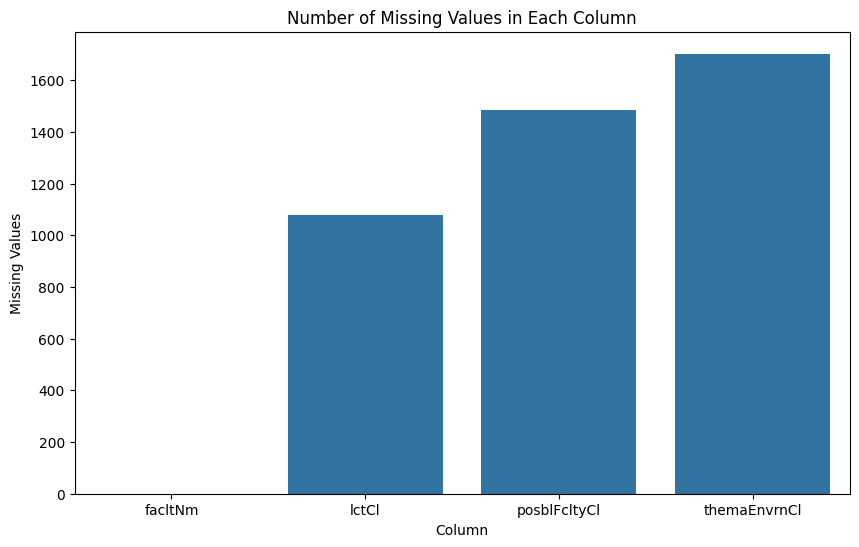

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPytho

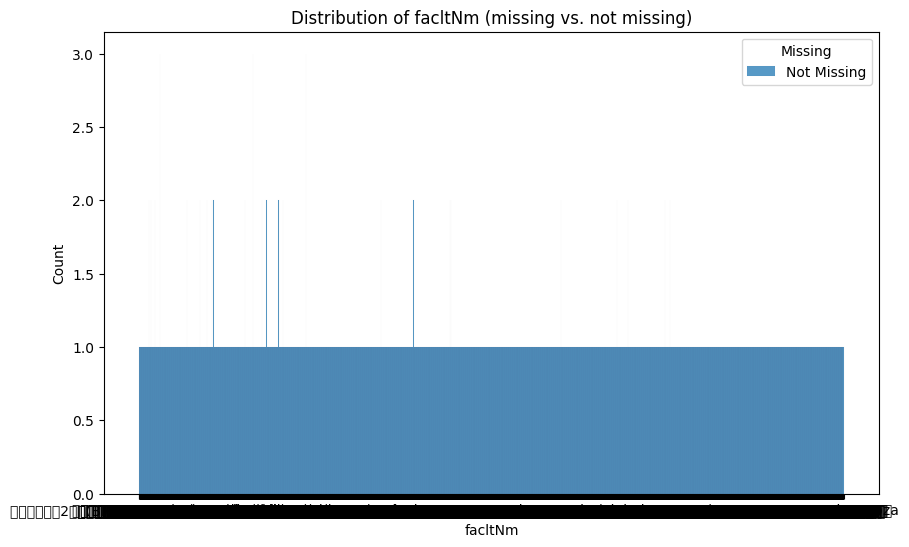

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

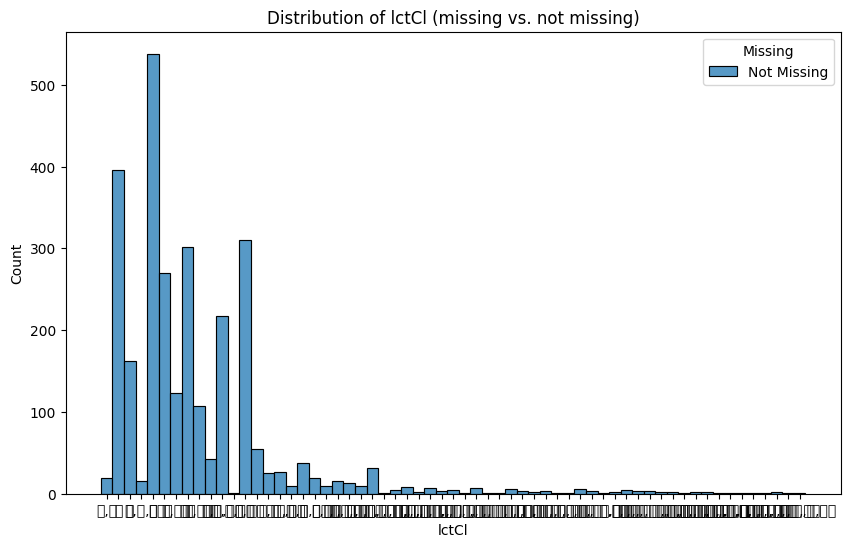

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52293 (\N{HANGUL SYLLABLE CAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

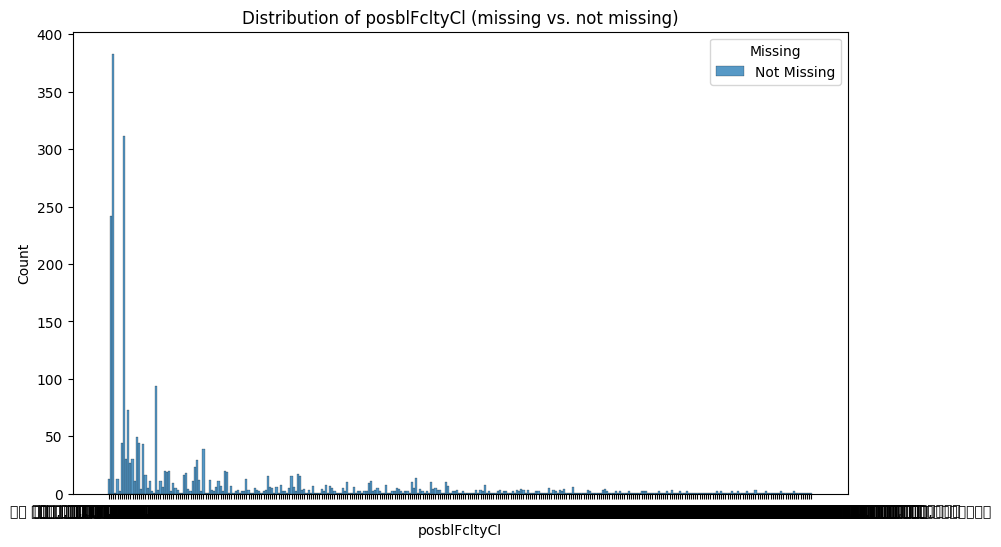

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45440 (\N{HANGUL SYLLABLE NOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

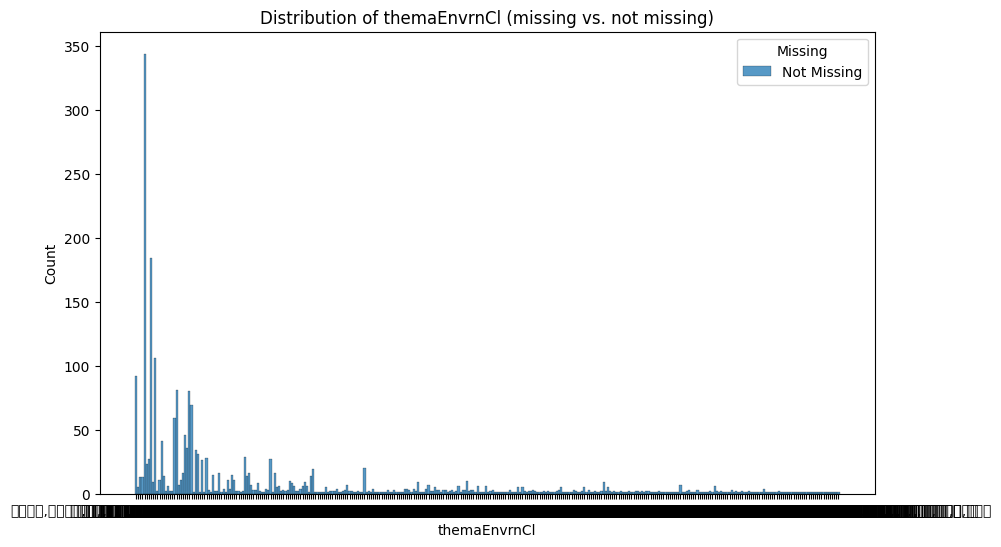

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPytho

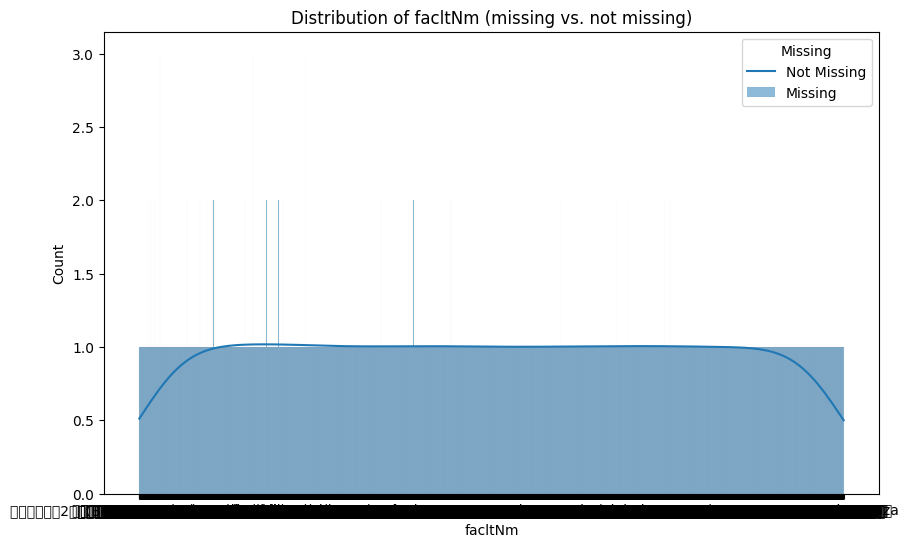

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

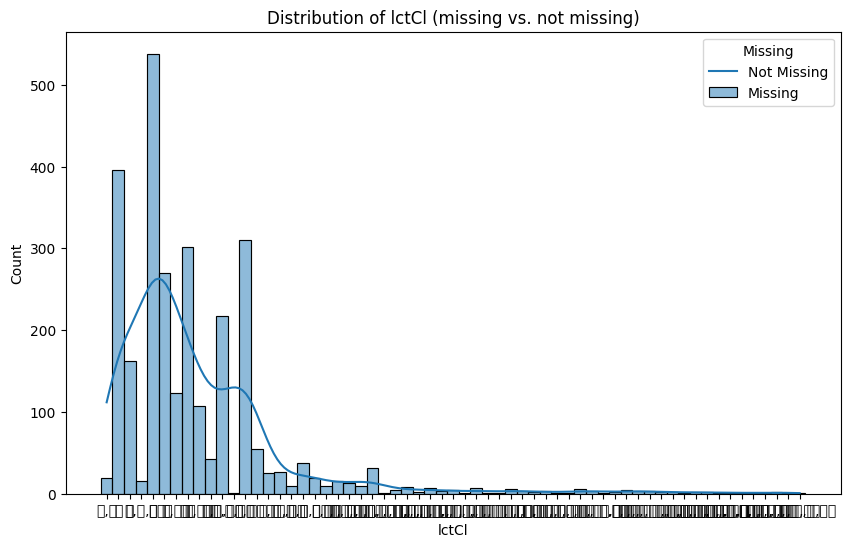

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52293 (\N{HANGUL SYLLABLE CAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

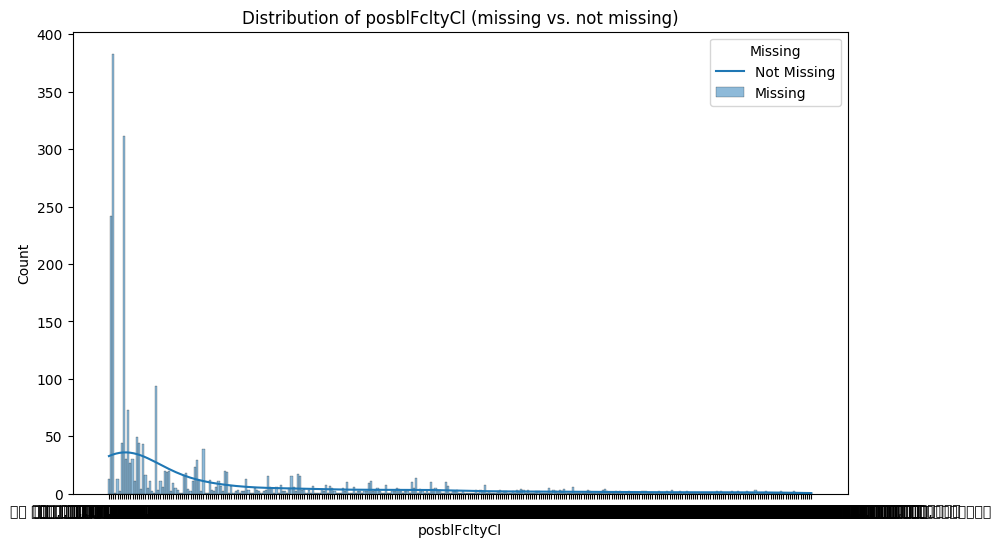

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45440 (\N{HANGUL SYLLABLE NOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

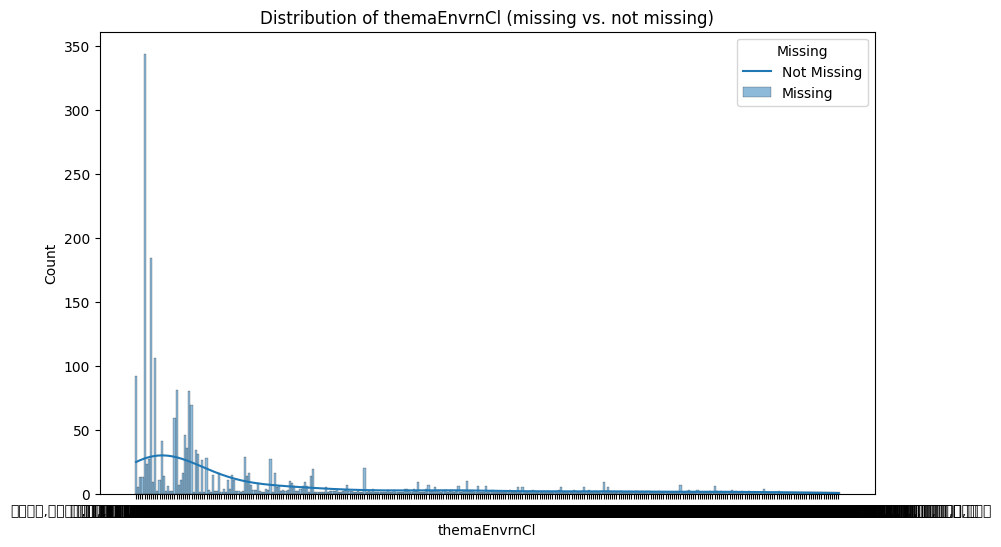

In [16]:
# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/GoCamping_Info.csv')

# 관심 있는 열 선택
columns_of_interest = ['facltNm', 'lctCl', 'posblFcltyCl', 'themaEnvrnCl']

# 각 열의 결측치 수 계산
missing_values = data[columns_of_interest].isnull().sum()

# 결측치 수를 데이터프레임으로 변환
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# 결측치 수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing Values', data=missing_values_df)
plt.title('Number of Missing Values in Each Column')
plt.show()

# 결측치 여부에 따른 분포도 시각화
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue=data[column].isnull(), multiple='stack')
    plt.title(f'Distribution of {column} (missing vs. not missing)')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Missing', labels=['Not Missing', 'Missing'])
    plt.show()

# 결측치 여부에 따른 분포도 시각화
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue=data[column].isnull(), multiple='stack', kde=True)
    plt.title(f'Distribution of {column} (missing vs. not missing)')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Missing', labels=['Not Missing', 'Missing'])
    plt.show()


In [17]:
import random
import numpy as np
from sklearn.metrics import jaccard_score

# 두 모델의 추천 결과를 얻기 위한 함수
def get_recommendations(model_func, style_name, doNm, envrn_filter=None, thema_filter=None, top_n=10, random_sample_n=5):
    recommended_camps = model_func(style_name, doNm, envrn_filter, thema_filter, top_n)
    if isinstance(recommended_camps, str):  # 예외 처리
        return []
    if len(recommended_camps) > random_sample_n:
        return random.sample(list(recommended_camps), random_sample_n)
    return recommended_camps

# 첫 번째 모델의 함수
def recommend_camping_style_v1(style_name, doNm, envrn_filter=None, thema_filter=None, top_n=10):
    if style_name not in data2['이름'].values:
        return "추천 스타일을 찾을 수 없습니다."

    style_index = data2[data2['이름'] == style_name].index[0]
    style_vector = tfidf_matrix_data2[style_index]

    filtered_data1 = data1[data1['doNm'] == doNm]
    if filtered_data1.empty:
        return f"{doNm} 지역에서 추천할 수 있는 캠핑장이 없습니다."

    if envrn_filter:
        filtered_data1 = filtered_data1[filtered_data1['lctCl'].str.contains(envrn_filter, na=False)]
        if filtered_data1.empty:
            return f"{doNm} 지역에 '{envrn_filter}' 환경을 가진 캠핑장이 없습니다."

    if thema_filter:
        filtered_data1 = filtered_data1[filtered_data1['themaEnvrnCl'].str.contains(thema_filter, na=False)]
        if filtered_data1.empty:
            return f"{doNm} 지역에 '{thema_filter}' 테마를 가진 캠핑장이 없습니다."

    filtered_indices = filtered_data1.index
    filtered_tfidf_matrix = tfidf_matrix_data1[filtered_indices]

    cosine_similarities = cosine_similarity(style_vector, filtered_tfidf_matrix).flatten()

    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    recommended_camps = filtered_data1.iloc[top_indices]['facltNm'].values

    return recommended_camps

# 두 번째 모델의 함수
def recommend_camping_style_v2(style_name, doNm, envrn=None, thema=None, top_n=10):
    if style_name not in data2['이름'].values:
        return "추천 스타일을 찾을 수 없습니다."

    style_index = data2[data2['이름'] == style_name].index[0]
    style_vector = tfidf_matrix_data2[style_index]

    filtered_data1 = data1[data1['doNm'] == doNm]
    if filtered_data1.empty:
        return f"{doNm} 지역에서 추천할 수 있는 캠핑장이 없습니다."

    if envrn:
        envrn_vector = envrn_vectorizer.transform([envrn])
    else:
        envrn_vector = np.zeros((1, envrn_tfidf_matrix.shape[1]))

    if thema:
        thema_vector = thema_vectorizer.transform([thema])
    else:
        thema_vector = np.zeros((1, thema_tfidf_matrix.shape[1]))

    filtered_indices = filtered_data1.index
    filtered_tfidf_matrix = tfidf_matrix_data1[filtered_indices]
    filtered_envrn_matrix = envrn_tfidf_matrix[filtered_indices]
    filtered_thema_matrix = thema_tfidf_matrix[filtered_indices]

    description_similarities = cosine_similarity(style_vector, filtered_tfidf_matrix).flatten()
    envrn_similarities = cosine_similarity(envrn_vector, filtered_envrn_matrix).flatten()
    thema_similarities = cosine_similarity(thema_vector, filtered_thema_matrix).flatten()

    combined_similarities = (description_similarities + envrn_similarities + thema_similarities) / 3

    top_indices = combined_similarities.argsort()[-top_n:][::-1]
    top_camps = filtered_data1.iloc[top_indices]['facltNm'].values

    return top_camps

# 추천 결과 비교
style_name = '오토캠핑'
doNm = '경기도'
envrn_filter = '산'
thema_filter = '걷기길'
top_n = 100
random_sample_n = 100

recommendations_v1 = get_recommendations(recommend_camping_style_v1, style_name, doNm, envrn_filter, thema_filter, top_n, random_sample_n)
recommendations_v2 = get_recommendations(recommend_camping_style_v2, style_name, doNm, envrn_filter, thema_filter, top_n, random_sample_n)

print(f"추천 캠핑장 (모델 1): {recommendations_v1}")
print(f"추천 캠핑장 (모델 2): {recommendations_v2}")

# Jaccard 유사도 계산
set_v1 = set(recommendations_v1)
set_v2 = set(recommendations_v2)
intersection = set_v1.intersection(set_v2)
union = set_v1.union(set_v2)
jaccard_similarity = len(intersection) / len(union)

print(f"Jaccard 유사도: {jaccard_similarity}")


추천 캠핑장 (모델 1): ['가평포레스트카라반랜드' '상아골계곡오토캠핑장' '송가네 오가리캠핑장' '포레스트 소울' '수목원프로방스 캠핑장' '들꽃여울캠핑장'
 '별빛누리 글램핑' '또올래캠핑장' '큰마당캠핑장' '썬오브캠핑장' '산야초 자연캠핑장' '신북온천글램핑장' '대회산캠핑장'
 '연미향마을 오토캠핑장' '솔바람캠핑장' '더 포레스트' '마운틴캠핑장' '산촌오토캠핑장' '치유의 숲 야영장' '은하수 캠핑장'
 '청담 관광농원' '유명산힐링캠프' '자일랜드' '포시즌스 오토캠핑장' '선녀와나무꾼' '코끼리캠핑장' '물골삼화힐링타운캠핑장'
 '주식회사 클럽 프라비다' '올덴캠핑장' '포천 베어스 글램핑 파크' '금동산야' '가래골농원 캠핑장' '숲속에안뜰 캠핑장'
 '너리굴문화마을 캠핑장' '소풍캠핑장' '개울가오토캠핑장' '유식물원 관광농원' '캠핑라운지' '소나무농원 캠핑장'
 '깊이울유원지 캠핑장' '각흘계곡 캠핑장' '힐링가평오토캠핑장' '아버지의숲 산정캠프' '포천글램핑앤카라반' '와이캠핑장'
 '캠프오후4시' '지지밸리야영장' '해피캠핑장' '파인벨리 펜션 앤 글램핑 주식회사' '하늘숲캠핑장' '짱아 야영장' '클럽노블픽'
 '캠프리카캠핑장' '축령산 자연휴양림' '양주송천캠핑장' '은사시캠핑장' '비학농원캠핑장' '지맨 카라반파크' '안양 산마을캠핑장'
 '캠핑 앨리스' '낭만캠핑장' '구르미의 오션' '숨캠핑장' '한코관광농원야영장' '가평 모아이 캠프' '캠핑플래닛'
 '가평황토은글램핑' '산장관광지' '위크팜글램핑' '산정호수 가족글램핑장' '삼정오토캠핑장' '수산아카데미' '수원산 오토캠핑장'
 '아이에프에이 캠프운악' '가래골농원 캠핑장2' '양주산막골캠핑장' '용인 자연휴양림 야영장' '용인 자연숲 캠핑장'
 '아롱별 캠핑장' '국망봉 자연휴양림캠핑장' '로코코캠핑장' '기산골캠핑장' '유명산밸리캠핑장' '티앤글램핑'
 '파인포레스트 글램핑' '팡팡캠핑장' '홀리데이캠핑장' '화야 캠핑장' '물동네 힐링 야영장' '두레캠핑장' '오